Load Julia packages (libraries) needed

In [1]:
using StatisticalRethinking, Optim
gr(size=(600,600));

### snippet 2.6

Grid of 1001 steps

In [2]:
p_grid = range(0, step=0.001, stop=1);

all priors = 1.0

In [3]:
prior = ones(length(p_grid));

Binomial pdf

In [4]:
likelihood = [pdf(Binomial(9, p), 6) for p in p_grid];

As Uniform prior has been used, unstandardized posterior is equal to likelihood

In [5]:
posterior = likelihood .* prior;

Scale posterior such that they become probabilities

In [6]:
posterior = posterior / sum(posterior);

### snippet 3.3

Sample using the computed posterior values as weights

In [7]:
N = 10000
samples = sample(p_grid, Weights(posterior), N);

In StatisticalRethinkingJulia samples will always be stored
in an MCMCChains.Chains object.

In [8]:
chn = MCMCChains.Chains(reshape(samples, N, 1, 1), ["toss"]);

Describe the chain

In [9]:
describe(chn)

2-element Array{ChainDataFrame,1}

Summary Statistics

│ Row │ parameters │ mean     │ std      │ naive_se   │ mcse       │ ess     │
│     │ Symbol     │ Float64  │ Float64  │ Float64    │ Float64    │ Any     │
├─────┼────────────┼──────────┼──────────┼────────────┼────────────┼─────────┤
│ 1   │ toss       │ 0.638553 │ 0.139672 │ 0.00139672 │ 0.00133872 │ 10000.0 │

Quantiles

│ Row │ parameters │ 2.5%    │ 25.0%   │ 50.0%   │ 75.0%   │ 97.5%   │
│     │ Symbol     │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ toss       │ 0.347   │ 0.545   │ 0.649   │ 0.742   │ 0.877   │


Plot the chain

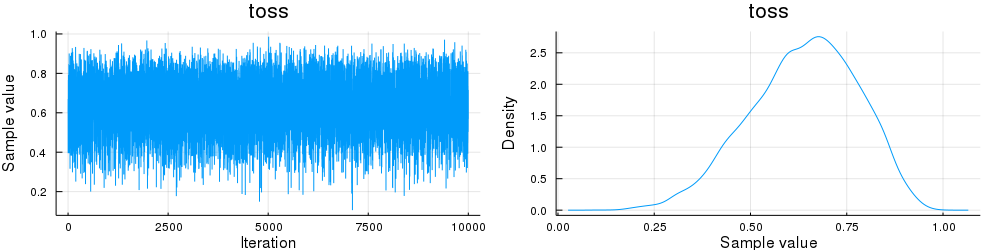

In [10]:
plot(chn)

Compute the MAP (maximum_a_posteriori) estimate

In [11]:
x0 = [0.5]
lower = [0.0]
upper = [1.0]

function loglik(x)
  ll = 0.0
  ll += log.(pdf.(Beta(1, 1), x[1]))
  ll += sum(log.(pdf.(Binomial(9, x[1]), repeat([6], 1))))
  -ll
end

(qmap, opt) = quap(loglik, x0, lower, upper)

([0.6666666665925677], Results of Optimization Algorithm
 * Algorithm: Fminbox with Gradient Descent
 * Starting Point: [0.5]
 * Minimizer: [0.6666666665925677]
 * Minimum: 1.297811e+00
 * Iterations: 3
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 5.55e-08 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: false
     |f(x) - f(x')| = 4.81e-14 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 2.27e-09 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 54
 * Gradient Calls: 54)

Show optimization results

In [12]:
opt

Results of Optimization Algorithm
 * Algorithm: Fminbox with Gradient Descent
 * Starting Point: [0.5]
 * Minimizer: [0.6666666665925677]
 * Minimum: 1.297811e+00
 * Iterations: 3
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 5.55e-08 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: false
     |f(x) - f(x')| = 4.81e-14 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 2.27e-09 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 54
 * Gradient Calls: 54

Fit quadratic approcimation

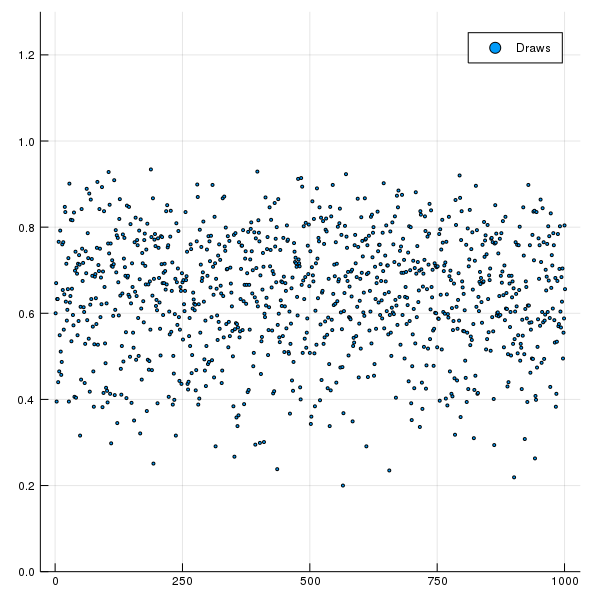

In [13]:
quapfit = [qmap[1], std(samples, mean=qmap[1])]

p = Vector{Plots.Plot{Plots.GRBackend}}(undef, 4)
p[1] = scatter(1:length(p_grid), samples, markersize = 2, ylim=(0.0, 1.3), lab="Draws")

analytical calculation

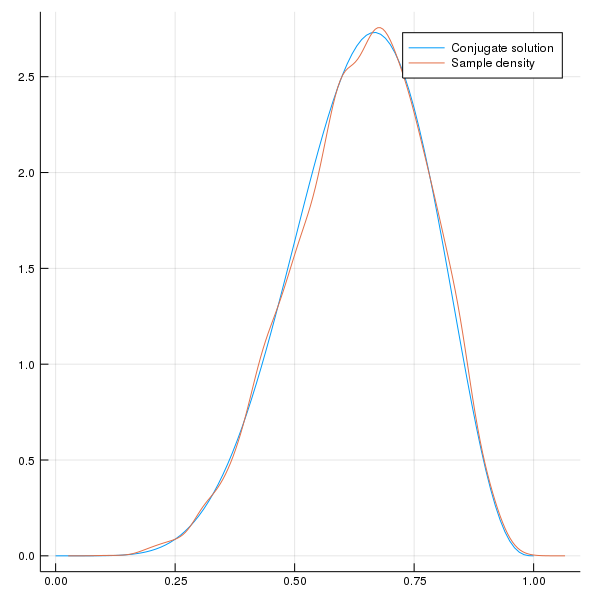

In [14]:
w = 6
n = 9
x = 0:0.01:1
p[2] = plot( x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")
density!(p[2], samples, lab="Sample density")

quadratic approximation

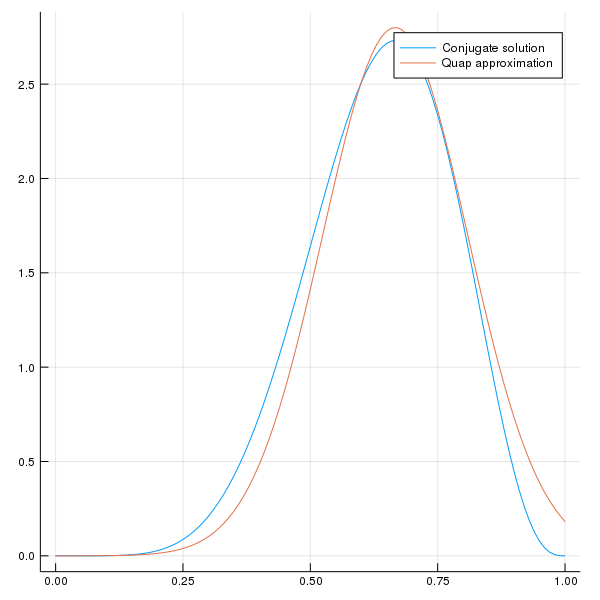

In [15]:
p[3] = plot( x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")
plot!( p[3], x, pdf.(Normal( quapfit[1], quapfit[2] ) , x ), lab="Quap approximation")

### snippet 2.7

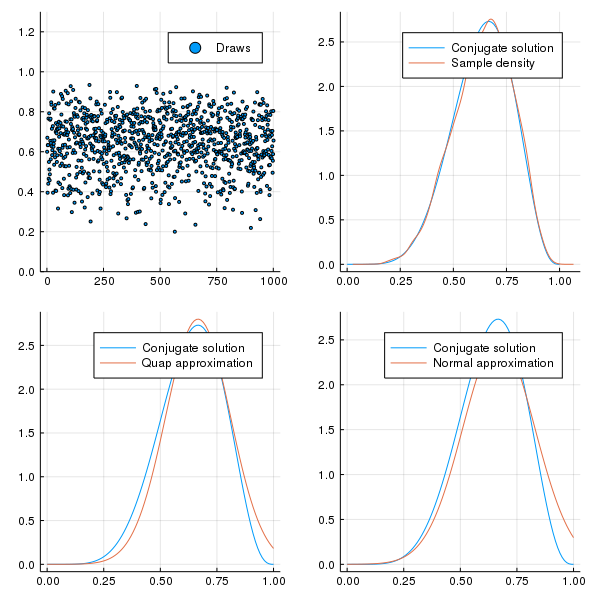

In [16]:
w = 6; n = 9; x = 0:0.01:1
p[4] = plot( x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")
plot!(p[4], x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation")
plot(p..., layout=(2, 2))

End of `02/clip-06-07.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*